In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import textblob
import os
#print(os.listdir("../input/"))
os.environ['PYTHONHASHSEED'] = '10000'
np.random.seed(10001)
import random
import tensorflow as tf
random.seed(10002)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=6, inter_op_parallelism_threads=5)
from keras import backend

tf.set_random_seed(10003)
backend.set_session(tf.Session(graph=tf.get_default_graph(), config=session_conf))
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


In [3]:
dir=r"C:\\Users\\vichu\\Documents\unifynd"
train = pd.read_csv(os.path.join(dir,"sentiment.tsv"),sep='\t',names=['sentiment','text'])

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer()
cv1.fit(train["text"])


print("Train Set Vocabulary Size:", len(cv1.vocabulary_))


Train Set Vocabulary Size: 5942


In [6]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(train['sentiment'])
print(le.classes_)
train['sentiment']=le.fit_transform(train['sentiment'])

['neg' 'pos']


In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

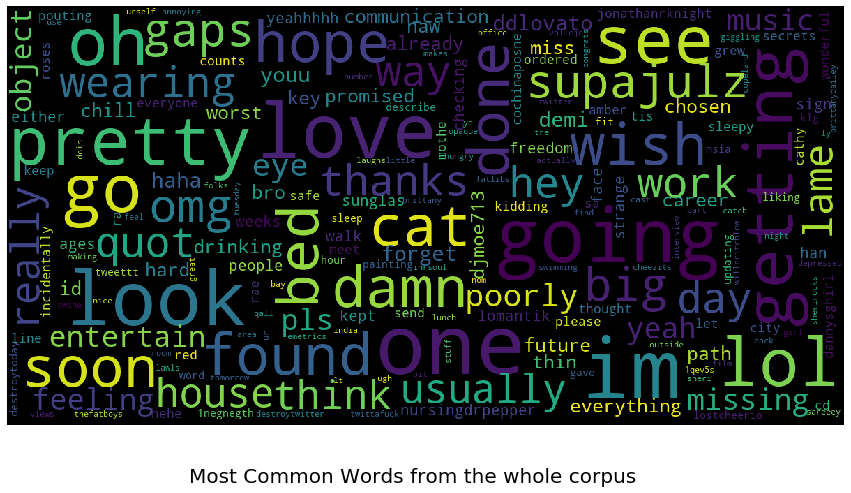

In [37]:
show_wordcloud(train['text'],'Most Common Words from the whole corpus')

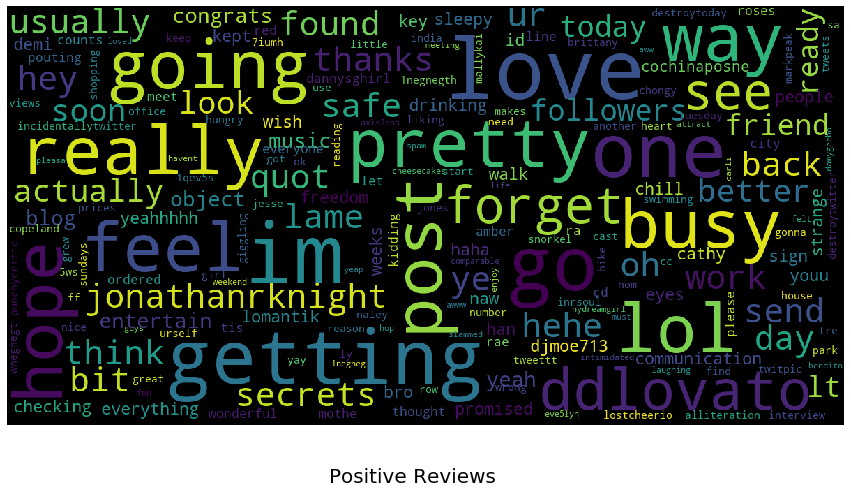

In [38]:
show_wordcloud(train[train['sentiment'] == 1]['text'],'Positive Reviews')

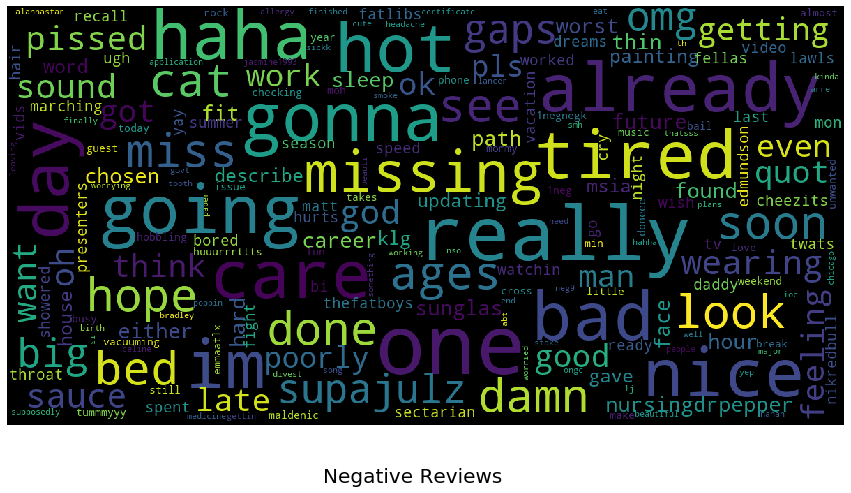

In [41]:
show_wordcloud(train[train['sentiment'] == 0]['text'],'Negative Reviews')

## Augumentation of DATA

In [7]:
from nltk import sent_tokenize
import json
random.seed(1994)
def tokenize(text):
    '''text: list of text documents'''
    tokenized =  sent_tokenize(text)
    return tokenized

def shuffle_tokenized(text):
    random.shuffle(text)
    newl=list(text)
    shuffled.append(newl)
    return text


df_train=train[['text','sentiment']]

augmented = []
reps=[]
for ng_rev in df_train[df_train.sentiment==0].text:
    tok = tokenize(ng_rev)
    shuffled= [tok]
    #print(ng_rev)
    for i in range(2):
    #generate 11 new reviews
        shuffle_tokenized(shuffled[-1])
    for k in shuffled:
        '''create new review by joining the shuffled sentences'''
        s = ' '
        new_rev = s.join(k)
        if new_rev not in augmented:
            augmented.append(new_rev)
        else:
            reps.append(new_rev)
df2=pd.DataFrame({'text':augmented,'sentiment':[0]*len(augmented)})
print(df2.shape)
df2.head()

(1255, 2)


,text,sentiment
0,"@jamielewislewis i cant believe it, it really ...",0
1,Had a dream about a walk in fast food resturau...,0
2,hates @internet @explrer (angry)(angry) **but ...,0
3,@federalcase I said I go out for eat 5:negneg...,0
4,@babykates7 yeah they won't do the surgery til...,0


In [8]:
train.head(10)

,sentiment,text
0,0,"@jamielewislewis i cant believe it, it really ..."
1,1,having a vodka tonic and looking forward to go...
2,1,@ddlovatofans1neg1 Could you follow me please....
3,1,@jordanknight for once.................. PLEAS...
4,0,Had a dream about a walk in fast food resturau...
5,1,@TroyBrownBBNews Yes... For a &quot;friend&quot;
6,1,Packing for work expierance
7,0,hates @internet @explrer (angry)(angry) **but ...
8,0,@federalcase I said I go out for eat 5:negneg...
9,0,@babykates7 yeah they won't do the surgery til...


In [9]:
augmented = []
reps=[]
for ng_rev in df_train[df_train.sentiment==1].text:
    tok = tokenize(ng_rev)
    shuffled= [tok]
    #print(ng_rev)
    for i in range(7):
    #generate 11 new reviews
        shuffle_tokenized(shuffled[-1])
    for k in shuffled:
        '''create new review by joining the shuffled sentences'''
        s = ' '
        new_rev = s.join(k)
        if new_rev not in augmented:
            augmented.append(new_rev)
        else:
            reps.append(new_rev)
df1=pd.DataFrame({'text':augmented,'sentiment':[1]*len(augmented)})
print(df1.shape)
df1.head()

(2005, 2)


,text,sentiment
0,having a vodka tonic and looking forward to go...,1
1,@ddlovatofans1neg1 Could you follow me please....,1
2,@jordanknight for once.................. ? PLE...,1
3,PLEASE TELL US WHY u were thinking of this per...,1
4,? @jordanknight for once.................. PLE...,1


In [10]:
df1=df1.append(df2)
#df0=df0.append(df2)
df1.shape

(3260, 2)

In [11]:
train=df1

In [12]:
train.head()

,text,sentiment
0,having a vodka tonic and looking forward to go...,1
1,@ddlovatofans1neg1 Could you follow me please....,1
2,@jordanknight for once.................. ? PLE...,1
3,PLEASE TELL US WHY u were thinking of this per...,1
4,? @jordanknight for once.................. PLE...,1


In [13]:
train[train.sentiment==0].shape,train[train.sentiment==1].shape

((1255, 2), (2005, 2))

In [14]:
print("Class distribution:\n{}".format(train["sentiment"].value_counts()/train.shape[0]))

Class distribution:
1    0.615031
0    0.384969
Name: sentiment, dtype: float64


## Feature creation

In [15]:
#
#     df["phrase_count"] = df.groupby("drug")["text"].transform("count")
# df['drug']=pd.factorize(df['drug'])[0]

def transform(df):
#     df['drug_count']=df['text'].apply(lambda x: len(np.intersect1d(x.split(),all_drugs)))
#     df["word_count"] = df["text"].apply(lambda x: len(x.split()))
    df["has_upper"] = df["text"].apply(lambda x: x.lower() != x)
    df['upper'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
    df["sentence_end"] = df["text"].apply(lambda x: x.endswith("."))
    df["after_comma"] = df["text"].apply(lambda x: x.startswith(","))
    df["sentence_start"] = df["text"].apply(lambda x: "A" <= x[0] <= "Z")
    df["text"] = df["text"].apply(lambda x: x.lower())
    import string
    punctuation=string.punctuation
    df['word_count']=df['text'].apply(lambda x: len(str(x).split(" ")))
    df['char_count'] = df['text'].str.len()
    def avg_word(sentence):
        words = sentence.split()
        return (sum(len(word) for word in words)/len(words))

    df['avg_word'] = df['text'].apply(lambda x: avg_word(x))
    from nltk.corpus import stopwords
    stop = stopwords.words('english')

    df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
    df['numerics'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
    
    df['word_density'] = df['char_count'] / (df['word_count']+1)
    df['punctuation_count'] = df['text'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
    
    return df

train = transform(train)
#test = transform(test)

# dense_features = ["phrase_count", "word_count", "has_upper", "after_comma", "sentence_start", "sentence_end",'char_count','avg_word','stopwords','numerics','word_density','punctuation_count','drug','upper']
dense_features = [ "word_count", "has_upper", "after_comma", "sentence_start", "sentence_end",'char_count','avg_word','stopwords','numerics','word_density','punctuation_count','upper']
train.groupby("sentiment")[dense_features].mean()

,word_count,has_upper,after_comma,sentence_start,sentence_end,char_count,avg_word,stopwords,numerics,word_density,punctuation_count,upper
sentiment,,,,,,,,,,,,
0,14.486056,0.770518,0.0,0.446215,0.342629,77.124303,4.663277,5.383267,0.078088,4.969370,4.142629,0.749801
1,14.911721,0.832918,0.0,0.425935,0.323691,83.824938,5.008720,5.203990,0.067332,5.325645,5.485287,0.735661


In [16]:
# train["drug"]%5

import re
import nltk
from nltk.corpus import stopwords
def url_to_words(raw_text):
    raw_text=raw_text.strip()
    no_coms=re.sub(r'\.com','',raw_text)
    no_urls=re.sub('https?://www','',no_coms)
    no_urls1=re.sub('https?://','',no_urls)
    try:
        no_encoding=no_urls1.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        no_encoding = no_urls1
    letters_only = re.sub("[^a-zA-Z0-9]", " ",no_encoding) 
    words = letters_only.split()                             
    stops = stopwords.words('english')         
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))


train['text']=train['text'].apply(url_to_words)
#test['text']=test['text'].apply(url_to_words)


In [17]:
train.sentiment.value_counts()

1    2005
0    1255
Name: sentiment, dtype: int64

In [18]:
NUM_FOLDS = 10
train["fold_id"] = train.reset_index()['index'].apply(lambda x: x%NUM_FOLDS)
train.head()

,text,sentiment,has_upper,upper,sentence_end,after_comma,sentence_start,word_count,char_count,avg_word,stopwords,numerics,word_density,punctuation_count,fold_id
0,vodka tonic looking forward going saddle ranch...,1,True,0,False,False,False,20,111,4.600000,9,0,5.285714,1,0
1,ddlovatofans1neg1 could follow please would re...,1,True,0,True,False,False,10,75,6.600000,2,0,6.818182,3,1
2,jordanknight please tell us u thinking person,1,True,4,False,False,False,14,94,5.785714,5,0,6.266667,22,2
3,please tell us u thinking person jordanknight,1,True,4,False,False,True,14,94,5.785714,5,0,6.266667,22,3
4,jordanknight please tell us u thinking person,1,True,4,False,False,False,14,94,5.785714,5,0,6.266667,22,4


In [19]:
# train["fold_id"].value_counts()
# train.groupby(['fold_id','sentiment']).count()
from sklearn.utils import shuffle
train=shuffle(train)

In [20]:
# EMBEDDING_FILE = "../input/glove-global-vectors-for-word-representation/glove.6B.100d.txt"
EMBEDDING_DIM = 300

# all_words = set(cv1.vocabulary_.keys()).union(set(cv2.vocabulary_.keys()))

# def get_embedding():
#     embeddings_index = {}
#     f = open(EMBEDDING_FILE)
#     for line in f:
#         values = line.split()
#         word = values[0]
#         if len(values) == EMBEDDING_DIM + 1 and word in all_words:
#             coefs = np.asarray(values[1:], dtype="float32")
#             embeddings_index[word] = coefs
#     f.close()
#     return embeddings_index

# embeddings_index = get_embedding()
# print("Number of words that don't exist in GLOVE:", len(all_words - set(embeddings_index)))

In [21]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = 350

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train["text"].values)
word_index = tokenizer.word_index
seq = pad_sequences(tokenizer.texts_to_sequences(train["text"]), maxlen=MAX_SEQUENCE_LENGTH)
#test_seq = pad_sequences(tokenizer.texts_to_sequences(test["text"]), maxlen=MAX_SEQUENCE_LENGTH)

In [22]:
nb_words = len(word_index) + 1

In [23]:
nb_words

5838

In [24]:
from keras.engine.topology import Layer
from keras import backend as K
from keras import initializers, regularizers, constraints, optimizers, layers
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None
        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [25]:
from keras.layers import *
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.models import Sequential

def build_model_only():
    model5_CNN= Sequential()
    model5_CNN.add(Embedding(nb_words,300,input_length=MAX_SEQUENCE_LENGTH))
    model5_CNN.add(Dropout(0.2))
    model5_CNN.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
    model5_CNN.add(GlobalMaxPooling1D())
    model5_CNN.add(Dense(128,activation='relu'))
    model5_CNN.add(Dropout(0.2))
    model5_CNN.add(Dense(2,activation='softmax'))
    model5_CNN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model5_CNN

In [26]:
dense_features

['word_count',
 'has_upper',
 'after_comma',
 'sentence_start',
 'sentence_end',
 'char_count',
 'avg_word',
 'stopwords',
 'numerics',
 'word_density',
 'punctuation_count',
 'upper']

In [ ]:
enc = OneHotEncoder(sparse=False)
enc.fit(train["sentiment"].values.reshape(-1, 1))
print("Number of classes:", enc.n_values_[0])

print("Class distribution:\n{}".format(train["sentiment"].value_counts()/train.shape[0]))

In [27]:
from keras.optimizers import Adam

In [28]:
scores=[]

## 10 Fold evaluvation

In [33]:
#test_preds1 = np.zeros((test.shape[0], 3))
from sklearn.metrics import accuracy_score
for i in range(NUM_FOLDS):
    print("FOLD", i+1)
    
    print("Splitting the data into train and validation...")
    train_seq, val_seq = seq[train["fold_id"] != i], seq[train["fold_id"] == i]
    train_dense, val_dense = train[train["fold_id"] != i][dense_features], train[train["fold_id"] == i][dense_features]
    y_train = enc.transform(train[train["fold_id"] != i]["sentiment"].values.reshape(-1, 1))
    y_val = enc.transform(train[train["fold_id"] == i]["sentiment"].values.reshape(-1, 1))
    
    print("Building the model...")
#     model = build_model_only()
    model = build_model_only()
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["acc"])
    
    early_stopping = EarlyStopping(monitor="val_acc", patience=2, verbose=1)
    
    print("Training the model...")
    model.fit(train_seq, y_train, validation_data=(val_seq, y_val),
              epochs=10, batch_size=8, shuffle=True, callbacks=[early_stopping], verbose=1)
#     print(np.argmax(model.predict([val_seq, val_dense[dense_features]], batch_size=128, verbose=1),axis=1),y_val)
    s=accuracy_score(np.argmax(model.predict(val_seq, batch_size=8, verbose=1),axis=1),train[train["fold_id"] == i]["sentiment"].values)
    scores.append(s)
    print('Evaluation',s)
    print("Predicting...")
    #test_preds1 += model.predict(test_seq, batch_size=8, verbose=1)
    #print()
    print(np.mean(scores))
    
#test_preds1 /= NUM_FOLDS

FOLD 1
Splitting the data into train and validation...
Building the model...
Training the model...
Train on 2933 samples, validate on 327 samples
Epoch 1/10
2933/2933 [==============================] - 32s 11ms/step - loss: 0.5317 - acc: 0.7102 - val_loss: 0.3639 - val_acc: 0.8226
Epoch 2/10
2933/2933 [==============================] - 30s 10ms/step - loss: 0.1614 - acc: 0.9352 - val_loss: 0.3554 - val_acc: 0.8502
Epoch 3/10
2933/2933 [==============================] - 30s 10ms/step - loss: 0.0184 - acc: 0.9932 - val_loss: 0.4340 - val_acc: 0.8593
Epoch 4/10
2933/2933 [==============================] - 29s 10ms/step - loss: 0.0034 - acc: 0.9990 - val_loss: 0.5234 - val_acc: 0.8532
Epoch 5/10
2933/2933 [==============================] - 29s 10ms/step - loss: 0.0013 - acc: 0.9993 - val_loss: 0.5541 - val_acc: 0.8593
Epoch 00005: early stopping
327/327 [==============================] - 1s 3ms/step
Evaluation 0.8593272171253823
Predicting...
0.8593272171253823
FOLD 2
Splitting the data in

2935/2935 [==============================] - 29s 10ms/step - loss: 7.4169e-04 - acc: 0.9997 - val_loss: 0.6402 - val_acc: 0.8338
Epoch 00007: early stopping
325/325 [==============================] - 1s 4ms/step
Evaluation 0.8338461538461538
Predicting...
0.8651164431898377
FOLD 9
Splitting the data into train and validation...
Building the model...
Training the model...
Train on 2935 samples, validate on 325 samples
Epoch 1/10
2935/2935 [==============================] - 31s 11ms/step - loss: 0.5312 - acc: 0.7087 - val_loss: 0.3397 - val_acc: 0.8462
Epoch 2/10
2935/2935 [==============================] - 29s 10ms/step - loss: 0.1453 - acc: 0.9424 - val_loss: 0.3130 - val_acc: 0.8769
Epoch 3/10
2935/2935 [==============================] - 31s 10ms/step - loss: 0.0155 - acc: 0.9959 - val_loss: 0.4257 - val_acc: 0.8708
Epoch 4/10
2935/2935 [==============================] - 32s 11ms/step - loss: 0.0031 - acc: 0.9990 - val_loss: 0.4968 - val_acc: 0.8738
Epoch 00004: early stopping
325/325

In [35]:
print('Accuracy',np.mean(scores))

Accuracy 0.8637854622441778
